<h1 style= 'text-align:center;'> 8.2 Exercise: Time Series Modeling </h1>

<p style= 'text-align: center;'> Bernard Owusu Sefah</p>

<p style= 'text-align: center;'> 8.2 Exercise: Time Series Modeling</p>

<p style= 'text-align: center;'> DSC 630</p>



## Step 1: Import Necessary Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## Step 2: Load the Dataset

We load the dataset and take a look at its structure.

In [113]:
# Load the dataset
file_path = 'us_retail_sales.csv'
retail_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
retail_data.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


## Step 3: Reshape and Prepare the Data for Time Series Analysis

In [114]:
import matplotlib.pyplot as plt

# Reshape the data to have a continuous time series
retail_data_melted = pd.melt(retail_data, id_vars=['YEAR'], var_name='MONTH', value_name='SALES')
retail_data_melted['DATE'] = pd.to_datetime(retail_data_melted['YEAR'].astype(str) + retail_data_melted['MONTH'], format='%Y%b')
retail_data_melted = retail_data_melted[['DATE', 'SALES']].sort_values('DATE').reset_index(drop=True)


## Step 4: Visualize the Data

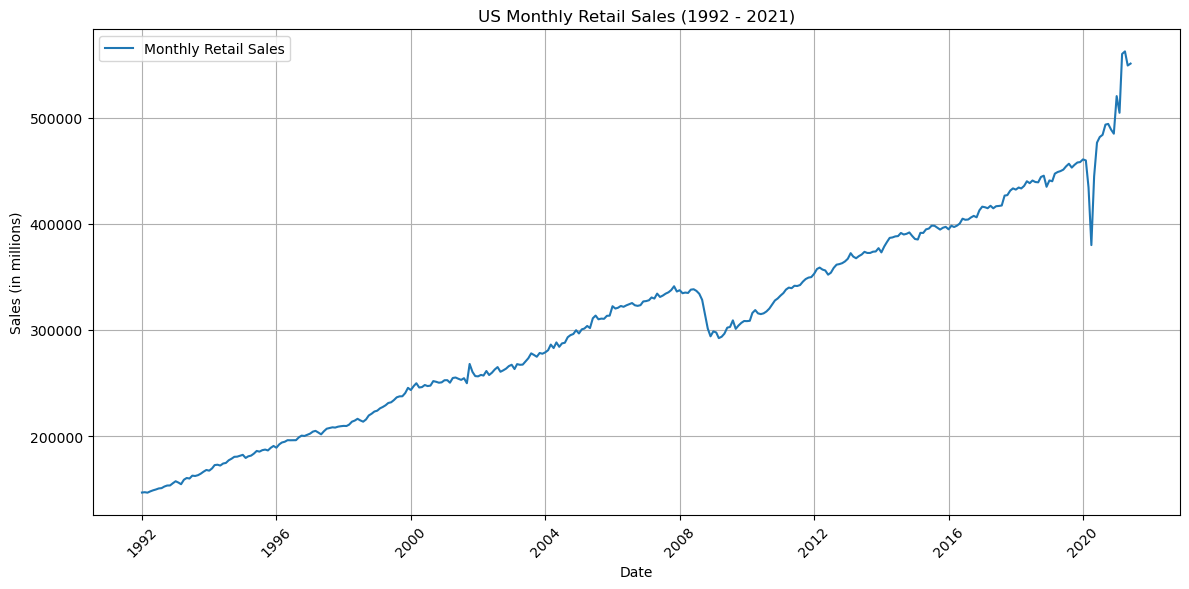

In [115]:
# Plot the retail sales data over time
plt.figure(figsize=(12, 6))
plt.plot(retail_data_melted['DATE'], retail_data_melted['SALES'], label='Monthly Retail Sales')
plt.title('US Monthly Retail Sales (1992 - 2021)')
plt.xlabel('Date')
plt.ylabel('Sales (in millions)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Overall Growth: There is a noticeable upward trend, indicating that retail sales have generally increased over the years.

2. Seasonal Patterns: There are recurring peaks around the end of each year, likely due to the holiday shopping season, followed by a dip at the beginning of the following year.

3. Sharp Drops: Some periods show sharp declines, which could be due to economic downturns or external events impacting retail sales, such as the 2008 financial crisis and the COVID-19 pandemic around 2020.

## Step 5: Check for Missing Values

It's essential to ensure there are no missing values.

In [116]:
# Check for missing values in the dataset
missing_values = retail_data_melted.isna().sum()

# Display columns with missing values and the count
missing_values[missing_values > 0]

SALES    6
dtype: int64

## Step 6: Clean the Data

Since there are missing values, will need to remove them.

In [117]:
# Identify the rows with missing SALES values
missing_data = retail_data_melted[retail_data_melted['SALES'].isna()]

# Display the rows with missing data
missing_data

,DATE,SALES
354,2021-07-01,NaN
355,2021-08-01,NaN
356,2021-09-01,NaN
357,2021-10-01,NaN
358,2021-11-01,NaN
359,2021-12-01,NaN


The missing values are from July 2021 to December 2021, which are beyond the intended test period of July 2020 to June 2021. Since they do not affect our test period, I will exclude these rows from the dataset

In [118]:
# Remove rows with missing sales data from the dataset
retail_data_melted = retail_data_melted.dropna().reset_index(drop=True)

## Step 7: Create Feature and Target Variables

In [119]:
# Prepare the data for modeling
retail_data_cleaned = retail_data_cleaned.copy() 
retail_data_cleaned.loc[:, 'MONTH_NUM'] = (retail_data_cleaned['DATE'] - retail_data_cleaned['DATE'].min()).dt.days

# Define feature matrix (X) and target vector (y)
X = retail_data_cleaned[['MONTH_NUM']]
y = retail_data_cleaned['SALES']

## Step 8: Split the Data into Training and Test Sets

In [120]:
# Split the data again into training and test sets
train = retail_data_melted[retail_data_melted['DATE'] < '2020-07-01']
test = retail_data_melted[retail_data_melted['DATE'] >= '2020-07-01']

## Step 9 Build and Train the Predictive Model

In [121]:
model = ARIMA(train['SALES'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  SALES   No. Observations:                  342
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3442.629
Date:                Thu, 17 Oct 2024   AIC                           6897.257
Time:                        20:38:47   BIC                           6920.249
Sample:                             0   HQIC                          6906.417
                                - 342                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0087      0.009     -0.952      0.341      -0.027       0.009
ar.L2         -0.1073      0.015     -7.207      0.000      -0.136      -0.078
ar.L3         -0.0159      0.046     -0.343      0.7

1. Model Information
Model: ARIMA(5, 1, 0) indicates the parameters (p, d, q). In this case:
p=5: The model uses 5 lagged observations for the autoregressive component.
d=1: The data was differenced once to make it stationary.
q=0: There is no moving average component.
No. Observations: 342 observations were used in the model.
Log Likelihood: -3442.629, a measure of model fit (higher is better).
AIC, BIC, HQIC: Metrics for model comparison; lower values generally indicate a better fit.

2. Coefficients Table
The table provides estimates for the autoregressive (AR) coefficients (ar.L1, ar.L2, etc.) and other parameters (sigma2):
coef: The estimated values of the coefficients.
std err: Standard error of the coefficient estimates.
z: The z-statistic, which tests the hypothesis that the coefficient is zero.
P>|z|: The p-value, which indicates the significance of the coefficient.
If the p-value is less than 0.05, the coefficient is considered statistically significant.
[0.025, 0.975]: The 95% confidence interval for the coefficients.

Key Observations:

ar.L2 has a p-value of 0.000, indicating a statistically significant impact on the model.
Other coefficients, like ar.L1, ar.L3, ar.L4, and ar.L5, have higher p-values, suggesting they might not be significantly contributing to the model.

3. Model Diagnostics
Ljung-Box (Q): Tests if there are significant autocorrelations in the residuals. A high p-value (>0.05) suggests no significant autocorrelation, indicating a good model fit.
Jarque-Bera (JB): Tests for normality in the residuals. A low p-value (0.00) suggests the residuals are not normally distributed, which might affect model assumptions.
Heteroskedasticity (H): Tests if the variance of residuals is constant. The result suggests some variance issues.
Skew/Kurtosis: Measures of residual distribution shape.

## Step 10: Make Predictions on the Test Set

Now that we have a trained ARIMA model, we'll use it to make predictions for the test set period (July 2020 – June 2021).

In [122]:
# Use the model to predict the sales for the test set period
predictions = model_fit.forecast(steps=len(test))

# Create a DataFrame to display predictions alongside the corresponding dates from the test set
predictions_with_dates = pd.DataFrame({
    'DATE': test['DATE'].values,
    'PREDICTED_SALES': predictions
})

# Print the predictions
print(predictions_with_dates)

          DATE  PREDICTED_SALES
342 2020-07-01    469487.694408
343 2020-08-01    463787.997060
344 2020-09-01    464692.971551
345 2020-10-01    466750.423550
346 2020-11-01    466955.277794
347 2020-12-01    466531.083054
348 2021-01-01    466432.666309
349 2021-02-01    466525.546253
350 2021-03-01    466569.369156
351 2021-04-01    466554.779671
352 2021-05-01    466542.017012
353 2021-06-01    466543.659767


The predictions provide an estimate of what the monthly retail sales could be based on the patterns observed in the training data (from January 1992 to June 2020).
The predicted values generally hover around the mid-460,000s, with slight variations month-to-month.
These predictions can be used to compare against the actual retail sales data to evaluate how well the model performed.

## Step 11: Evaluate the Model Performance

In [123]:
# Calculate the Root Mean Squared Error (RMSE) between predictions and actual sales
rmse = np.sqrt(mean_squared_error(test['SALES'], predictions))
print(f"RMSE: {rmse}")

RMSE: 57005.61388901209


The Root Mean Squared Error (RMSE) of the ARIMA model predictions on the test set is approximately 57,006. This value indicates the average deviation of the predicted monthly retail sales from the actual sales in the test period.

## Step 12: Visualize Predictions vs. Actual Sales

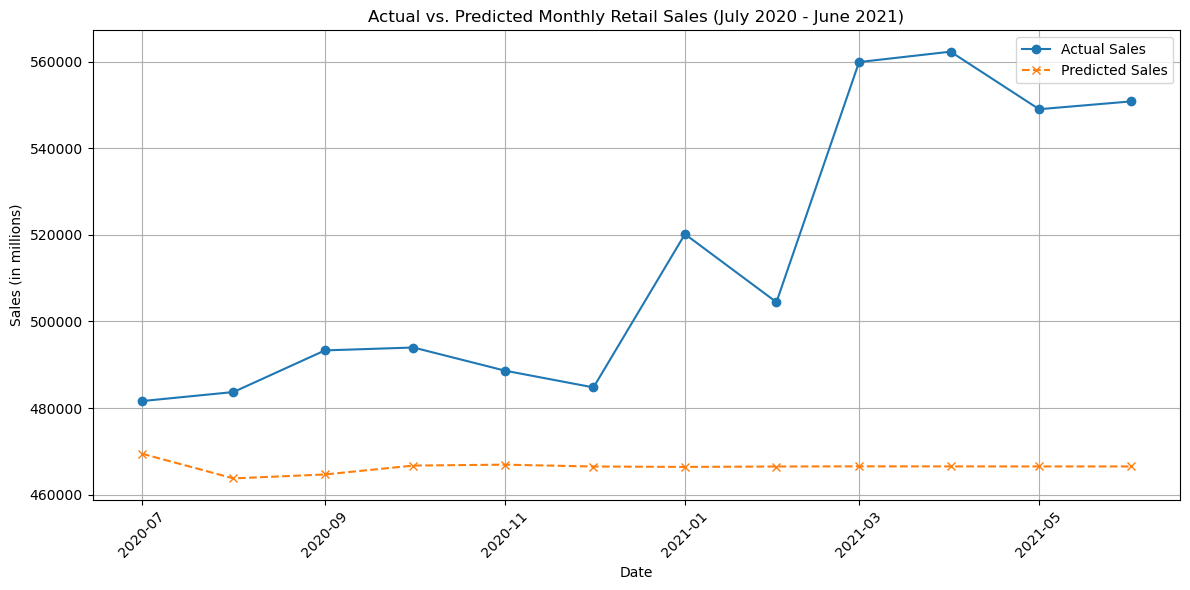

In [124]:
# Plot actual vs. predicted sales for the test set period
plt.figure(figsize=(12, 6))
plt.plot(test['DATE'], test['SALES'], label='Actual Sales', marker='o')
plt.plot(predictions_with_dates['DATE'], predictions_with_dates['PREDICTED_SALES'], label='Predicted Sales', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Monthly Retail Sales (July 2020 - June 2021)')
plt.xlabel('Date')
plt.ylabel('Sales (in millions)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph above shows the comparison between actual and predicted monthly retail sales from July 2020 to June 2021. The solid line represents the actual sales, while the dashed line represents the predicted values. This visual comparison helps to assess how well the ARIMA model performed during the test period.

## References

Dataset provided by: Prof Andrew Hua. 